<a href="https://colab.research.google.com/github/daniel8691/anomaly-detection-in-time-series-data/blob/master/Anomaly_detection_in_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tensorflow version: 2.2.0


In [2]:
from pandas_datareader import data as wb

Load the SP500 index data. Data used for the study will be from 2006 to today (2020-07-27)


In [3]:
ticker = "^GSPC"
market_index_df = pd.DataFrame()

market_index_df['sp500'] = wb.DataReader(ticker, data_source = 'yahoo', start = "2006-1-1")['Adj Close']

In [4]:
market_index_df.tail()

,sp500
Date,
2020-07-21,3257.300049
2020-07-22,3276.020020
2020-07-23,3235.659912
2020-07-24,3215.629883
2020-07-27,3239.409912


In [5]:
market_index_df.head()

,sp500
Date,
2006-01-03,1268.800049
2006-01-04,1273.459961
2006-01-05,1273.479980
2006-01-06,1285.449951
2006-01-09,1290.150024


In [6]:
market_index_df.shape


(3666, 1)

In [7]:
market_index_df = market_index_df.reset_index()


In [8]:
market_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3666 non-null   datetime64[ns]
 1   sp500   3666 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.4 KB


In [9]:
market_index_df = market_index_df.rename(columns={"Date":"date"})

In [10]:
fig = go.Figure(
    data = [go.Scatter(x=market_index_df['date'], y = market_index_df['sp500'], mode="lines")],
    # layout = go.layout(
    #     title = go.layout.Title(text = "SP500 index trend")
    # )
)
fig.show()

Data Preprocessing

In [11]:
market_df = market_index_df

In [12]:
market_df.iloc[int(len(market_df)*0.8):len(market_df)]

,date,sp500
2932,2017-08-25,2443.050049
2933,2017-08-28,2444.239990
2934,2017-08-29,2446.300049
2935,2017-08-30,2457.590088
2936,2017-08-31,2471.649902
...,...,...
3661,2020-07-21,3257.300049
3662,2020-07-22,3276.020020
3663,2020-07-23,3235.659912
3664,2020-07-24,3215.629883


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# create training and testing data. 80% for training and 20% for testing
train, test = train_test_split(market_df,test_size=0.2, shuffle = False)

In [15]:
# check if the training and testing data are split correctly
print(train.shape)
print(test.shape)
print((train.shape[0]) / (market_df.shape[0]) * 100)

(2932, 2)
(734, 2)
79.97817785051828


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
train.head()

,date,sp500
0,2006-01-03,1268.800049
1,2006-01-04,1273.459961
2,2006-01-05,1273.479980
3,2006-01-06,1285.449951
4,2006-01-09,1290.150024


In [18]:
scaler = StandardScaler()
scaler = scaler.fit(train[['sp500']])

train['close'] = scaler.transform(train[['sp500']])
test['close'] = scaler.transform(test[['sp500']])

In [19]:
train.head()

,date,sp500,close
0,2006-01-03,1268.800049,-0.659673
1,2006-01-04,1273.459961,-0.648621
2,2006-01-05,1273.479980,-0.648573
3,2006-01-06,1285.449951,-0.620183
4,2006-01-09,1290.150024,-0.609036


Create training and test splits

In [20]:
def create_sequences(X,y, time_steps = 1):
  Xs, ys = [], []
  for i in range(len(X) - time_steps):
    Xs.append(X.iloc[i: (i+time_steps)].values)
    ys.append(y.iloc[i+time_steps])
  return np.array(Xs), np.array(ys)

In [21]:
time_steps = 30

x_train, y_train = create_sequences(train[['close']], train['close'], time_steps)
x_test, y_test = create_sequences(test[['close']], test['close'], time_steps)

In [22]:
x_train.shape

(2902, 30, 1)

In [23]:
x_train[:3]

array([[[-0.65967328],
        [-0.64862097],
        [-0.64857348],
        [-0.62018328],
        [-0.60903572],
        [-0.61012694],
        [-0.59947735],
        [-0.61873624],
        [-0.61506015],
        [-0.62615994],
        [-0.63801887],
        [-0.62115551],
        [-0.67701117],
        [-0.67148501],
        [-0.66427469],
        [-0.66944502],
        [-0.64774342],
        [-0.62428643],
        [-0.62079997],
        [-0.63291976],
        [-0.6272749 ],
        [-0.65483503],
        [-0.67098674],
        [-0.6686387 ],
        [-0.69292575],
        [-0.66714446],
        [-0.67157969],
        [-0.66396635],
        [-0.67376183],
        [-0.64371121]],

       [[-0.64862097],
        [-0.64857348],
        [-0.62018328],
        [-0.60903572],
        [-0.61012694],
        [-0.59947735],
        [-0.61873624],
        [-0.61506015],
        [-0.62615994],
        [-0.63801887],
        [-0.62115551],
        [-0.67701117],
        [-0.67148501],
        [

Build a LSTM autoencoder

In [24]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [26]:
model = Sequential([
                    # create LSTM layer
                    LSTM(128, input_shape = (timesteps, num_features)),
                    Dropout(0.2),
                    # repeat 30 times
                    RepeatVector(timesteps),
                    # mirror encoder in reverse fashion
                    LSTM(128, return_sequences=True),
                    Dropout(0.2),
                    TimeDistributed(Dense(num_features))
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

Train the Autoencoder

fit the mdoel into the training data

earlystopping: monitors the validation loss can detect when the network has stopped improving nad learning and stop the training process

In [27]:
# if the network doesnt improve for 3 consecutive epochs we will stop the training process (patience = 3)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3, mode = "min")
history = model.fit(
    x_train, y_train,
    # doesn't matter what this number is because EarlyStopping will monitor and stop at the right time
    epochs = 100,
    batch_size = 32,
    # use 10% for validation
    validation_split = 0.1,
    callbacks = [es],
    # don't shuffle the data because the order of our data really matters
    shuffle = False


)

Epoch 1/100
82/82 [==============================] - 7s 83ms/step - loss: 0.1918 - val_loss: 0.1874
Epoch 2/100
82/82 [==============================] - 6s 72ms/step - loss: 0.1309 - val_loss: 0.0812
Epoch 3/100
82/82 [==============================] - 6s 72ms/step - loss: 0.1555 - val_loss: 0.1882
Epoch 4/100
82/82 [==============================] - 6s 73ms/step - loss: 0.0925 - val_loss: 0.1279
Epoch 5/100
82/82 [==============================] - 6s 73ms/step - loss: 0.0925 - val_loss: 0.1357


Plot metrics and evaluate the model

In [28]:
import matplotlib.pyplot as plt

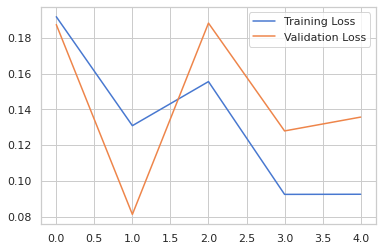

In [29]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.legend()

In [31]:
x_train_pred = model.predict(x_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(x_train_pred - x_train), axis=1), columns = ["error"])

In [32]:
train_mae_loss.head()

,error
0,0.163847
1,0.172528
2,0.184866
3,0.191315
4,0.193034


In [33]:
model.evaluate(x_test,y_test)

22/22 [==============================] - 0s 22ms/step - loss: 0.4143


0.4143165647983551

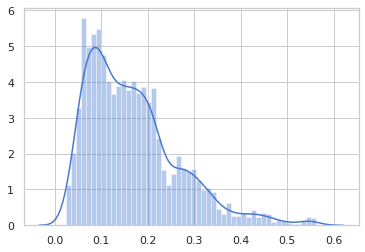

In [34]:
sns.distplot(train_mae_loss, bins = 50, kde = True)

In [35]:
threshold = 0.65

In [37]:
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis = 1)

In [39]:
test_mae_loss[:5]

array([[0.12032353],
       [0.12214604],
       [0.12463442],
       [0.12911514],
       [0.13752632]])

Anomalies are the data that exceed a threshold of 0.65 as set earlier

In [41]:
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['close'] = test[time_steps:].close

In [43]:
test_score_df.head()

,date,sp500,close,loss,threshold,anomaly
2962,2017-10-09,2544.729980,2.366559,0.120324,0.65,False
2963,2017-10-10,2550.639893,2.380576,0.122146,0.65,False
2964,2017-10-11,2555.239990,2.391486,0.124634,0.65,False
2965,2017-10-12,2550.929932,2.381264,0.129115,0.65,False
2966,2017-10-13,2553.169922,2.386576,0.137526,0.65,False


In [45]:
# check if we have anomalies
test_score_df['anomaly'].sum()

48

In [50]:
# check which values in the sp500 dataset contain anomalies
# check by graphing using the plotly library
fig = go.Figure()
# populate the figure
fig.add_trace(go.Scatter(x =test[time_steps:].date, y= test_score_df.loss,
                         mode="lines",name="Test Loss"))
fig.add_trace(go.Scatter(x =test[time_steps:].date, y= test_score_df.threshold,
                         mode="lines",name="Threshold"))
fig.update_layout(showlegend=True)


In [53]:
anomalies = test_score_df[test_score_df.anomaly == True]

In [54]:
anomalies.head()

,date,sp500,close,loss,threshold,anomaly
3229,2018-10-30,2682.629883,2.693628,0.666522,0.65,True
3267,2018-12-26,2467.699951,2.183860,0.705962,0.65,True
3268,2018-12-27,2488.830078,2.233976,0.662677,0.65,True
3541,2020-01-29,3273.399902,4.094807,0.660114,0.65,True
3542,2020-01-30,3283.659912,4.119142,0.674452,0.65,True


In [55]:
# use plotly again to plot figures
fig = go.Figure()
fig.add_trace(go.Scatter(x =test[time_steps:].date, y= scaler.inverse_transform(test[time_steps:].close),
                         mode="lines",name="Close Price"))
fig.add_trace(go.Scatter(x =anomalies.date, y= scaler.inverse_transform(anomalies.close),
                         mode="lines",name="Anomaly"))
fig.update_layout(showlegend=True)
fig.show()